In [1]:
import pandas as pd
result = pd.read_csv('ex6.csv')

In [8]:
# this will restrict the number of rows that are displayed on the screen
pd.options.display.max_rows =10

In [6]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
...,...,...,...,...,...
9998,-0.362559,0.598894,-1.843201,0.887292,G
9999,-0.096376,-1.012999,-0.657431,-0.573315,0


In [9]:
#we can even use nrows as a parameter
pd.read_csv('ex6.csv',nrows=10)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


* When using the max_rows it will read the complete file and then display 10 rows
* When we use the <strong>nrows</strong> parameter it will read only 10 rows from the file

* <strong>chunksize</strong> is a parameter of integer type which means it will accept data only of that much size (chunksize=1000)
* This means it will read data only of 1000 bytes and skips the rest of the data.

In [11]:
chunk = pd.read_csv('ex6.csv',chunksize=1000)
chunk

### Writing data to a text format

In [13]:
data = pd.read_csv('ex5.csv')
data


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


* <strong>to_csv(filename)</strong> is a function name used to convert the data into csv format


In [14]:
data.to_csv('xyz.csv')
#If you want to store the data in diff directory then given the fully qualified path(absolute path)

In [16]:
#If you want to store  the data as csv but the delimiter as something other than ',' then we can give 'sep'
#ex : sep='@'-------> Now sep acts as a delimiter in a file
#if you want to store the data into stdout(cliffboard) 
import sys
data.to_csv(sys.stdout,na_rep="NULL")

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [17]:
#Wherever we had a null data we  replaced all the values with the string NULL
#if you dont want to store indexes and also header then we make these arguments as False when reading the file
data.to_csv('out2.csv',index=False, header=False)


In [18]:
#If you want to give the custom column names then we can do as follows
data.to_csv('out3.csv',index=False, columns=['a','b','c'])

 ### Daterange

In [28]:
import numpy as np
dates = pd.date_range('1/1/2000',periods=7)
ts = pd.Series(np.arange(7),index=dates)
ts.to_csv('tseries.csv')
ts


2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int64

In [23]:
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [24]:
#the type of dates is DatetimeIndex
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

* <strong>np.arange(n) is used to generate the data from 0 to n-1.</strong>
* <strong>numpy arange can also mention the floating point numbers</strong>
* <strong>range() can mention only integer numbers</strong>
* <strong>arange() is not present in python. It is present only in numpy</strong>


* <strong>You can try to create your own indices </strong>
* <strong> The length of indices and length of array should match. Else we get error</strong>

In [25]:
ts = pd.Series(np.arange(7),index=dates)

In [26]:
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int64

### Reading CSV without using pandas library

In [29]:
import csv
f = open('ex5.csv')

reader = csv.reader(f)
reader

In [30]:
for line in reader:
    print(line)

['something', 'a', 'b', 'c', 'd', 'message']
['one', '1', '2', '3', '4', 'NA']
['two', '5', '6', '', '8', 'world']
['three', '9', '10', '11', '12', 'foo']


In [36]:
#another way of reading data but this is not recommended
with open('ex7.csv') as f:
    lines = list(csv.reader(f))
    

In [37]:
header,values = lines[0],lines[1:]

In [39]:
# zip() always takes an iterable object as a parameter.
data_dict ={h:v for h,v in zip(header,zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

### Task

In [42]:
l1=[1,2,3,4,5]
l2=[6,7,8,9,0]
[i for i in zip(l1,l2)]
    

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 0)]

In [43]:
dict_comp = {h:v for h,v in zip(l1,l2)}

In [44]:
dict_comp

{1: 6, 2: 7, 3: 8, 4: 9, 5: 0}

## Reading Json Data


In [50]:
obj = """
{
    "name" :"Roopesh",
    "places_lived":["Dhone","Kurnool","Hyderabad","Bangalore"],
    "pet": null,
    "age" :"24"       
}
"""


In [51]:
import json
result = json.loads(obj)
result

{'name': 'Roopesh',
 'places_lived': ['Dhone', 'Kurnool', 'Hyderabad', 'Bangalore'],
 'pet': None,
 'age': '24'}

In [52]:
asjson=json.dumps(result)

In [54]:
asjson

'{"name": "Roopesh", "places_lived": ["Dhone", "Kurnool", "Hyderabad", "Bangalore"], "pet": null, "age": "24"}'

* <strong>json.dumps(jsondata) is to convert json data into a string</strong>
* <strong>json.loads(stringdata) is to convert a string to json</strong>

## Reading HTML data


In [55]:
tables = pd.read_html('fdic_failed_bank_list.html')
len(tables)
failures = tables[0]
failures.head()


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


## Binary Data Formats

* We are trying to read data from csv and then trying to convert that into a data of unreadable format using pickle

In [56]:
frame = pd.read_csv('ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [65]:
frame.to_pickle('frame_pickle')


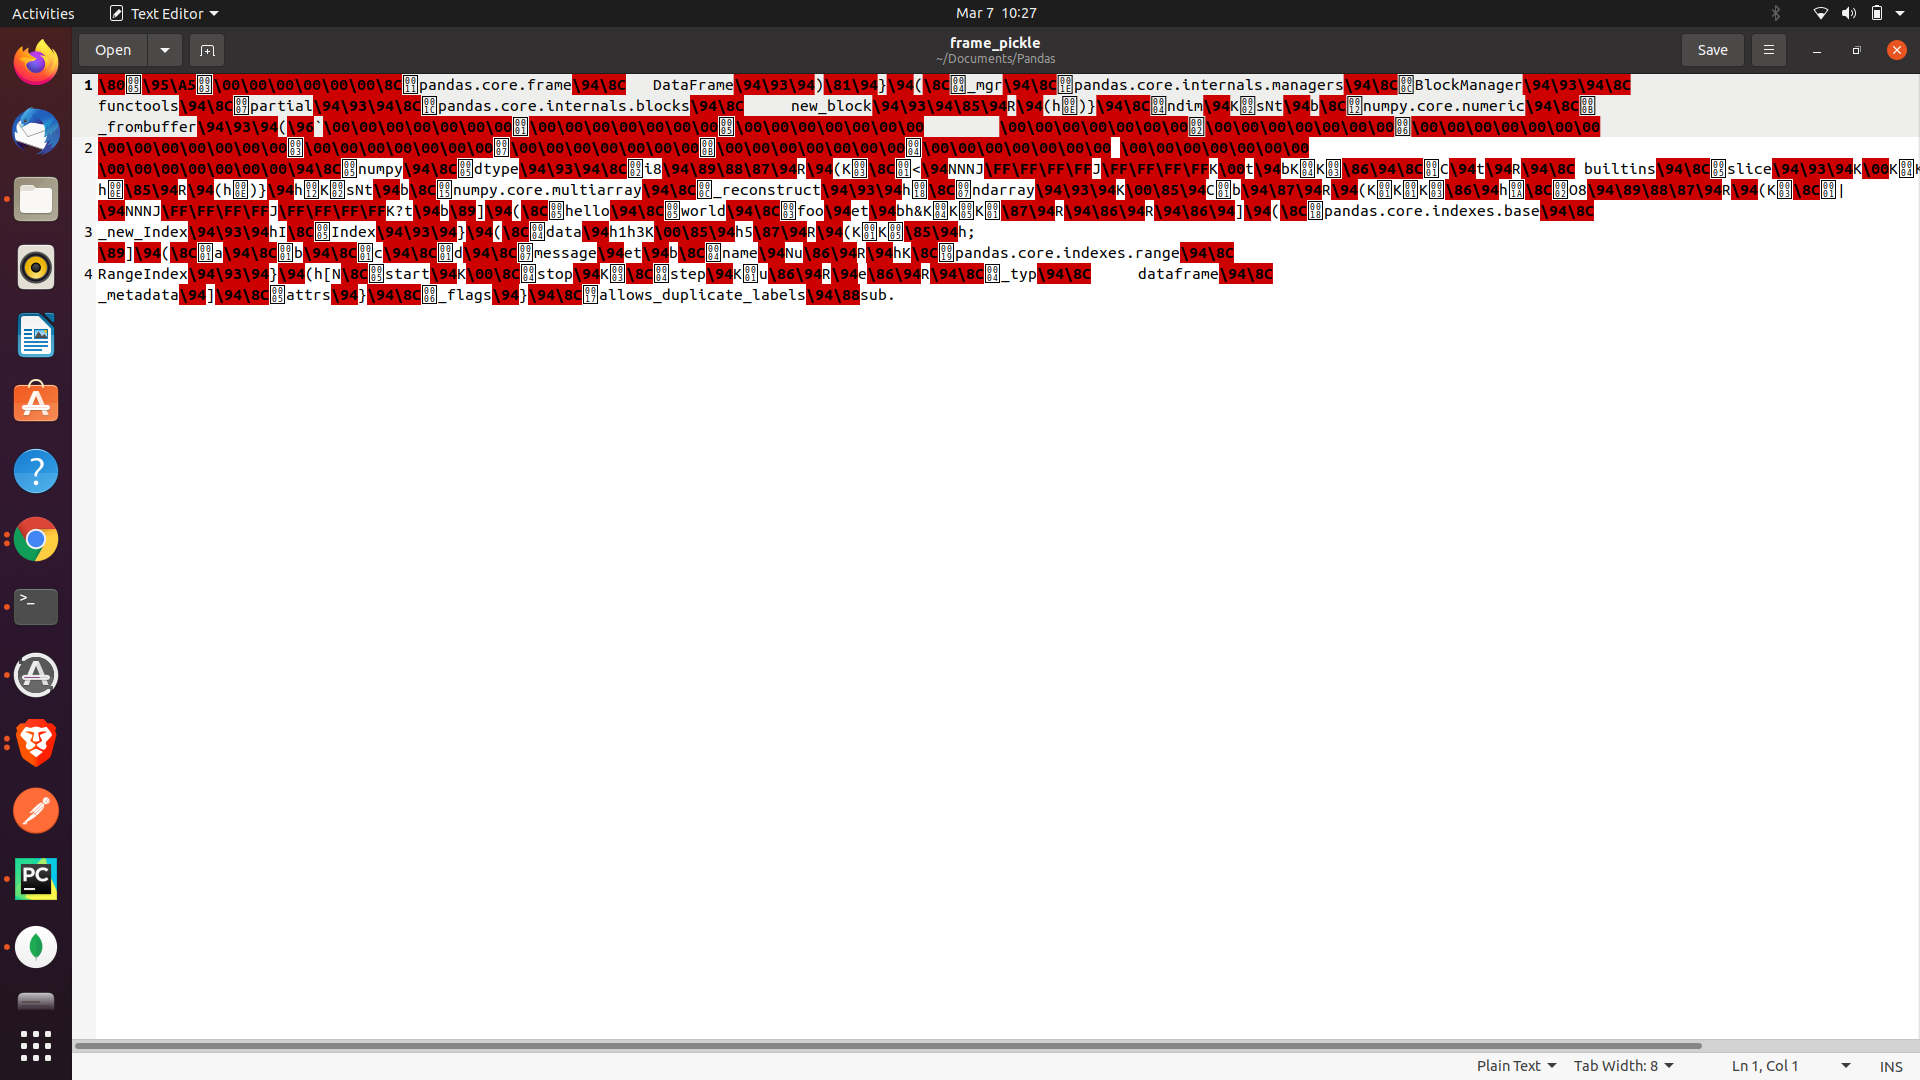

* This will perform <strong>serde</strong> operation which is known as serialization and deserialization
* Converting object to byte code is known as <strong>serialization</strong> and reverse is known as<strong> deserialization</strong>

In [66]:
pd.read_pickle('frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
